# A Study of the Lifespan and Careers of the Prime Ministers of India

---------


This post was partly inspired by the [post](https://www.reddit.com/r/dataisbeautiful/comments/7ioatb/lifespans_of_the_presidents_of_the_united_states/) made on Reddit about the US Presidents, and by a need to understand the career of the Prime Ministers as well. I will be adding additional details to this jupyter-notebook so that we can get a better perspective of the people who have held that post in the past.

C:\Users\vinay.keerthi\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


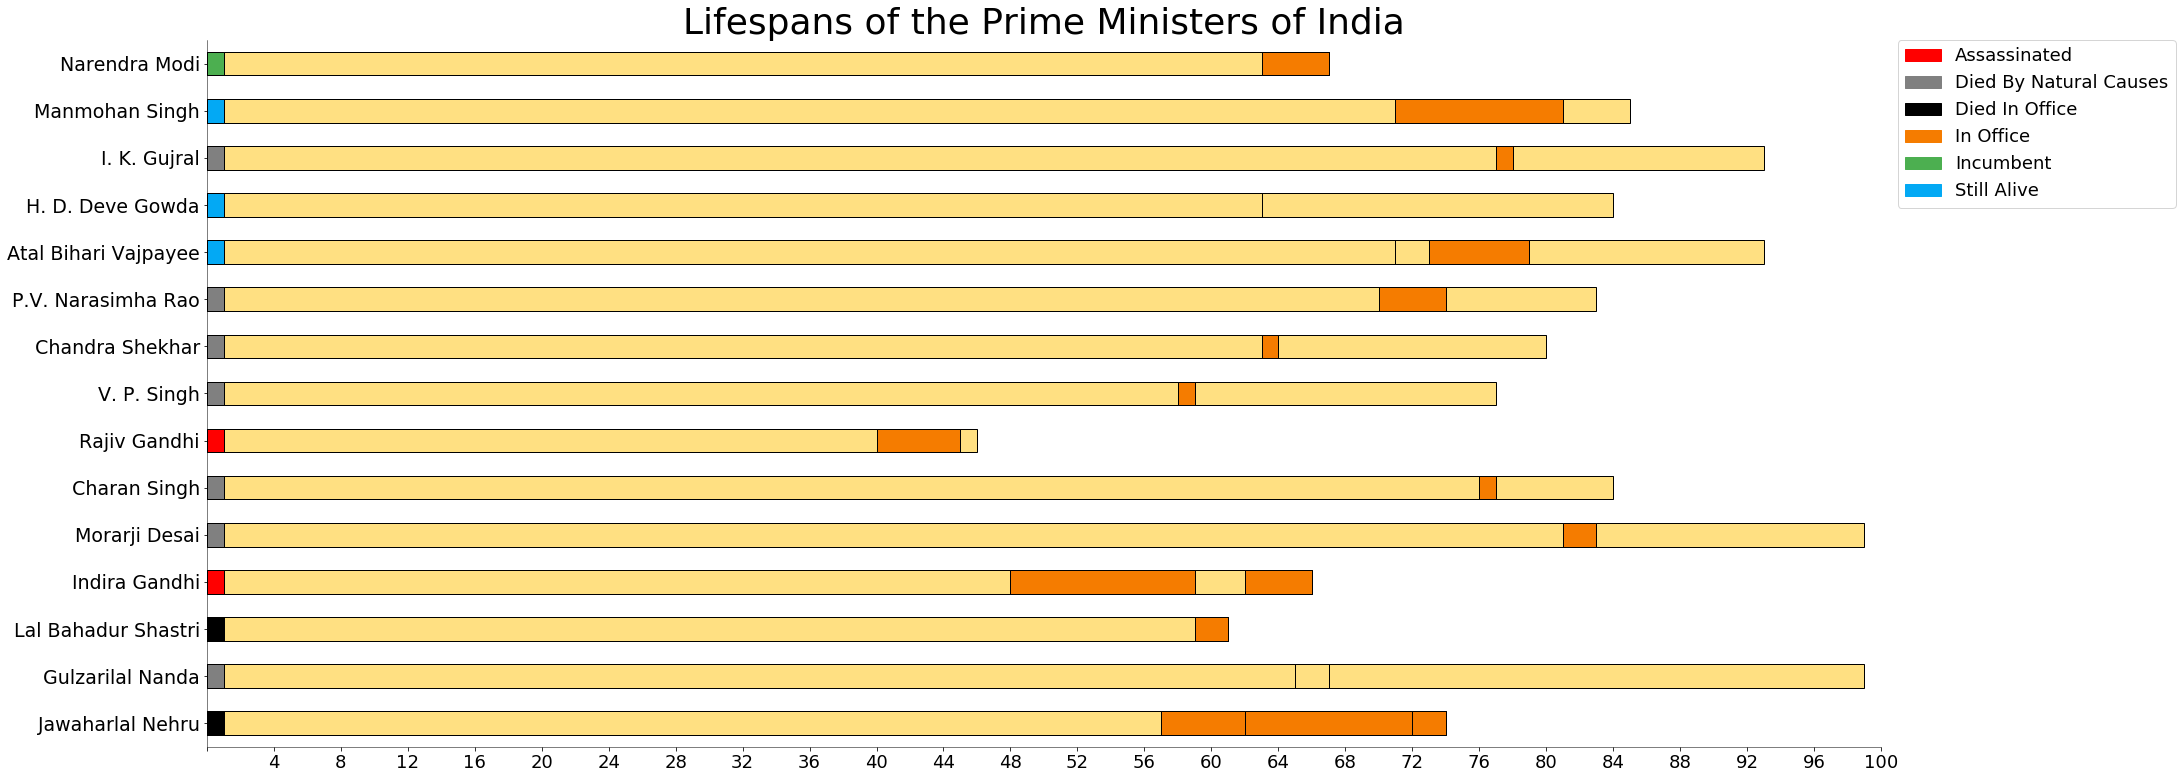

In [1]:
import datetime
import pandas as pd
from IPython.display import display

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

colors = {
    "incumbent":"#4CAF50",
    "assassinated":"red",
    "still alive":"#03A9F4",
    "died in office": "black",
    "died by natural causes": "grey",
    "in office":"#F57C00"
}

table= pd.read_excel("data.xlsx")

date_columns = ["Date of Birth","Date of Death","Term Start", "Term End"]
for date_column in date_columns:
    table[date_column] = pd.to_datetime(table[date_column])
    table[date_column] = [x.date() for x in table[date_column]]


table["Age"] = [(y-x).days if not pd.isnull(y) else (datetime.datetime.today().date()-x).days for x,y in zip(table["Date of Birth"], table["Date of Death"])]
table["Age"] = [x/365 for x in table["Age"]]

table["age_term_start"] = [(y-x).days if not pd.isnull(y) else (datetime.datetime.today().date()-x).days for x,y in zip(table["Date of Birth"], table["Term Start"])]
table["age_term_start"] = [x/365 for x in table["age_term_start"]]

table["age_term_end"] = [(y-x).days if not pd.isnull(y) else (datetime.datetime.today().date()-x).days for x,y in zip(table["Date of Birth"], table["Term End"])]
table["age_term_end"] = [x/365 for x in table["age_term_end"]]
                           

plt.rcParams["figure.figsize"]=(15,5)
#plt.rcParams["font.family"] = "Serif"
plt.rcParams["axes.labelsize"] = 18
plt.rcParams["axes.titlesize"] = 36
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["savefig.edgecolor"] = "black"

edgecolor="black"

# First, plot unique prime ministers' life span as a hbar.
pm_age_df = table[["Name","Age"]].copy()
pm_age_df.drop_duplicates(inplace=True)
ax = pm_age_df.plot.barh(y="Age", x="Name", figsize=(30, 13), color="#FFE082",legend=False, title="Lifespans of the Prime Ministers of India", edgecolor=edgecolor)
labels = ax.set_yticklabels(pm_age_df["Name"], fontsize=19)
ax.set_xlabel("")
ax.set_ylabel("")
# Then, plot their terms on this graph.
x_ticks = ax.set_xticks(range(0,105,4))
x_ticklabels = ax.set_xticklabels([str(x) if x !=0 else "" for x in range(0, 105, 4)], fontsize=18)
for i, pm in enumerate(pm_age_df["Name"]):
    pm_terms_df = table.loc[table["Name"] == pm]
    
    for ix, row in pm_terms_df.iterrows():
        ax.barh(bottom=i,height=0.5, left=row["age_term_start"], width=row["age_term_end"]-row["age_term_start"], color=colors["in office"], edgecolor=edgecolor)
        if row["Mode of Death"] == "Assassination":
            stat_color = colors["assassinated"] # assassinated
        elif pd.isnull(row["Date of Death"]):
            if not pd.isnull(row["Term End"]):
                stat_color=colors["still alive"] # Still Alive
            else:
                stat_color = colors["incumbent"] # Incumbent
        else:
            if row["Mode of Death"] != "Assassination" and row["Term End"] == row["Date of Death"]:
                stat_color = colors["died in office"] # died in office.
            else:
                stat_color = colors["died by natural causes"]
    ax.barh(bottom=i, height=0.5, left=0, width=1, color=stat_color, edgecolor=edgecolor)
xlims = ax.set_xlim(right=100)

handles = []
for key in sorted(colors.keys()):
    patch = mpatches.Patch(color=colors[key], label=key.title(), edgecolor="black")
    handles.append(patch)
plt.legend(handles=handles, fontsize=18, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()